
**Selected Topics In Ai 1 Assigment 3**

**1- Hussein Hesham Hussein Badawy ----------- 20190183**

**2- Nour Eldin Ahmed Ezzat** ------------------------------- **20190593**

**3- Youssef Mohamed** ---------------------------------------- **20190645**


# 1 - Load Data

In [74]:
#install Kaggle
!pip install Kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [75]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"hussienhisham","key":"d83de9f8285ff8f7d63703a2976841af"}'}

In [76]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [77]:
! kaggle datasets download -d ardamavi/sign-language-digits-dataset

sign-language-digits-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [78]:
! unzip /content/sign-language-digits-dataset.zip

Archive:  /content/sign-language-digits-dataset.zip
replace Sign-language-digits-dataset/X.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Sign-language-digits-dataset/X.npy  
  inflating: Sign-language-digits-dataset/Y.npy  
  inflating: X.npy                   
  inflating: Y.npy                   


# 2- Import Lib

In [79]:
import numpy as np 
import pandas as pd 
from numpy import log,dot,exp,shape
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from subprocess import check_output
print(check_output(["ls", "../content/Sign-language-digits-dataset"]).decode("utf8"))


X.npy
Y.npy



# 3- Preprocess Data

(-0.5, 63.5, 63.5, -0.5)

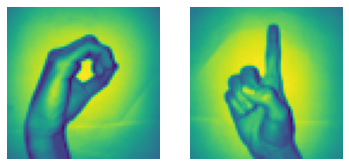

In [80]:
# load data set
x_l = np.load('../content/X.npy')
Y_l = np.load('../content/Y.npy')
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')

In [81]:
# Join a sequence of arrays along an row axis.
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0) # from 0 to 204 is zero sign and from 205 to 410 is one sign 
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


In [106]:
def standardize(X_tr):
    for i in range(shape(X_tr)[1]):
        X_tr[:,i] = (X_tr[:,i] - np.mean(X_tr[:,i]))/np.std(X_tr[:,i])

standardize(x_l)

# 4- Divide data into training and testing with percentages 80% and 20%.

In [227]:
# Then lets create x_train, y_train, x_test, y_test arrays
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, shuffle=True , random_state=42)
#With random_state=42, we get the same train and test sets across different executions, but in this time, the train and test sets are different from the previous case with random_state=0 .
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

Now we have 3 dimensional input array (X) so we need to make it flatten (2D) in order to use as input for our first deep learning model.
Our label array (Y) is already flatten(2D) so we leave it like that.
Lets flatten X array(images array).

In [228]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (328, 4096)
X test flatten (82, 4096)


In [229]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 328)
x test:  (4096, 82)
y train:  (1, 328)
y test:  (1, 82)


**Choose our labels (classes) that are sign zero and sign one**
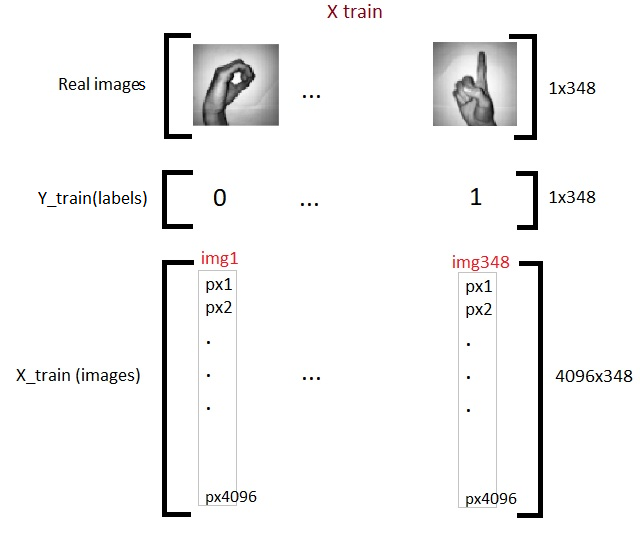

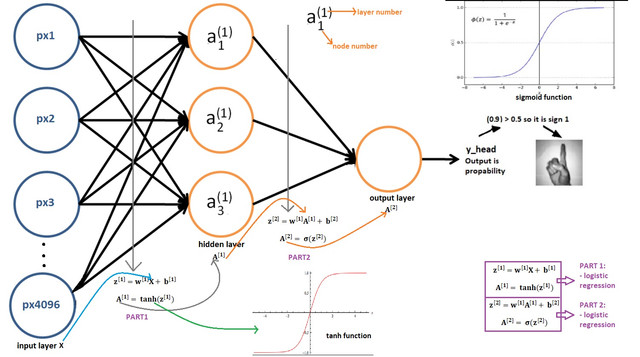

**There is one hidden layer between input and output layers. And this hidden layer has 3 nodes.** 

# 5- Implement Functions



In [230]:
# intialize parameters and layer sizes
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

In [231]:
# Sigmoid
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

#defining the tanh function using the relation
def tanh(x):
    return 2*sigmoid(2*x)-1

In [232]:
# Forward propagation steps:
# find z = w.T*x+b
# y_head = sigmoid(z)
# loss(error) = loss(y,y_head)
# cost = sum(loss)
def forward_propagation_NN(x_train, parameters):

    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [233]:
# Compute cost
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

In [234]:
# In backward propagation we will use y_head that found in forward progation
# Therefore instead of writing backward propagation method, lets combine forward propagation and backward propagation
# Backward Propagation
def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

In [235]:
# update parameters
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters

In [236]:
# prediction
def predict_NN(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

**Create Model**

Cost after iteration 0: 0.320101
Cost after iteration 10: 0.313227
Cost after iteration 20: 0.312372
Cost after iteration 30: 0.313705
Cost after iteration 40: 0.314315
Cost after iteration 50: 0.313674
Cost after iteration 60: 0.312325
Cost after iteration 70: 0.310590
Cost after iteration 80: 0.308557
Cost after iteration 90: 0.306235
Cost after iteration 100: 0.303621
Cost after iteration 110: 0.300717
Cost after iteration 120: 0.297528
Cost after iteration 130: 0.294064
Cost after iteration 140: 0.290339
Cost after iteration 150: 0.286373
Cost after iteration 160: 0.282190
Cost after iteration 170: 0.277816
Cost after iteration 180: 0.273281
Cost after iteration 190: 0.268615
Cost after iteration 200: 0.263849
Cost after iteration 210: 0.259010
Cost after iteration 220: 0.254126
Cost after iteration 230: 0.249220
Cost after iteration 240: 0.244313
Cost after iteration 250: 0.239425
Cost after iteration 260: 0.234572
Cost after iteration 270: 0.229767
Cost after iteration 280: 0.225

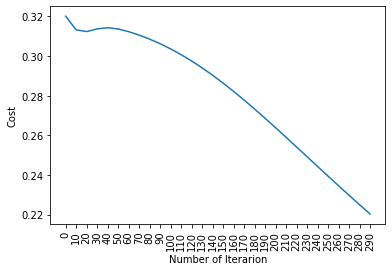



train accuracy: 91.46341463414635 %
test accuracy: 90.2439024390244 %


F1-Score :  0.888888888888889
Precision Score :  0.9142857142857143
Recall Score :  0.8648648648648649


In [251]:
# 2 - Layer neural network
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 10 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    print("\n")
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    print("\n")
    # print F-Score
    print("F1-Score : ", f1_score(y_test,y_prediction_test  , pos_label='positive', average='micro'))
    print("Precision Score : ",precision_score ( y_test, y_prediction_test,  pos_label='positive', average='micro'))
    print("Recall Score : ",recall_score(y_test, y_prediction_test,  pos_label='positive' , average='micro'))

    return parameters

parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=300)

* Precesion = TP/TP+FP
* Recall = TP/TP+FN
* F-1 = 2*(Precesion*Reacall)/(precesion+Recall)
* Acc = TP+TN/TP+FP+TN+FN

# Comment

We used "sign language digits data set" for this Assigment.
https://www.kaggle.com/datasets/ardamavi/sign-language-digits-dataset

In this data there are 2062 sign language digits images.

As you know digits are from 0 to 9. Therefore there are 10 unique sign.

In data, sign zero is between indexes 204 and 408. Number of zero sign is 205.

Also sign one is between indexes 822 and 1027. Number of one sign is 206. Therefore, we used 205 samples from each classes(labels).



Details of datasets:
Image size: 64x64
Color space: Grayscale
File format: npy
Number of classes: 10 (Digits: 0-9)
Number of participant students: 218
Number of samples per student: 10

- we created 2 layer neural network

- Initialized parameters weights and bias

- Forward propagation

- Loss function and Cost function

- Backward propagation

- Update Parameters

- Prediction with learnt parameters weight and bias

- Create Model

We trained this model with 300 epochs and the cost decreased signfically as number of iteration increased , and weigts has been updated .we started from Cost after iteration 0: 0.320101 to Cost after iteration 300 : ~  0.2 . We reached test accuracy: 90.2439024390244 %, F1-Score :  0.888888888888889 wich is considerd as A good Model

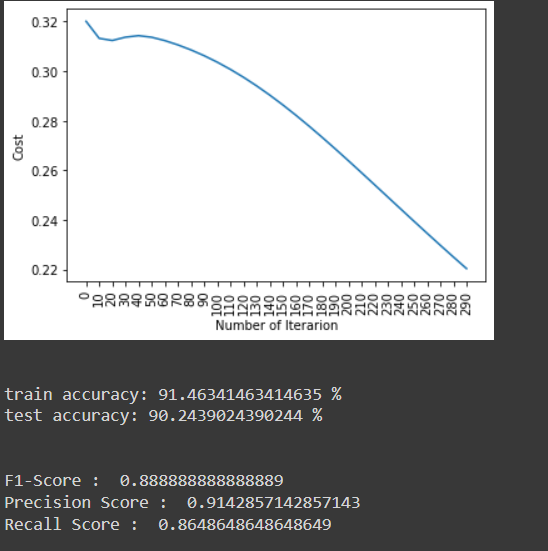